In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
from sklearn import preprocessing

In [2]:
weather = pd.read_csv("clean_weather.csv")
weather.shape

(2861, 12)

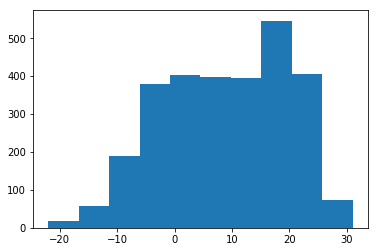

In [3]:
plt.hist(weather["Mean Temp (C)"])
plt.show()

In [4]:
weather.dropna(axis=0,inplace=True)
weather.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Mean Temp (C)',
       'Total Rain (mm)', 'Total Snow (mm)', 'Total Precip (mm)', 'Winter',
       'Summer', 'Spring', 'Fall'],
      dtype='object')

In [5]:
weather.drop(columns=["Unnamed: 0"],inplace=True)

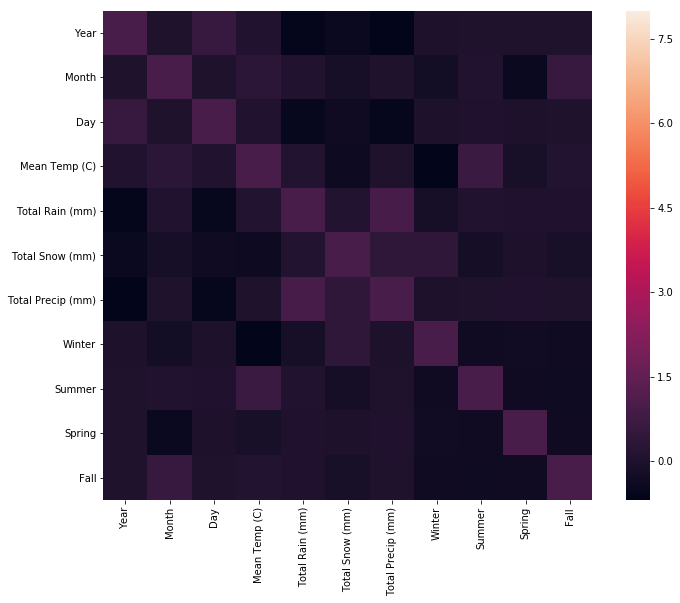

In [6]:
corrmat = weather.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=8,square=True)
plt.show()

In [7]:
#convert temp to Kelvin 
weather["Mean Temp (C)"] = weather["Mean Temp (C)"].apply(lambda x : x + 273.0)

cols = weather.columns.tolist()
columns = [c for c in cols if c not in ["Year","Month","Day","Mean Temp (C)"]]
target = "Mean Temp (C)"

weather.head(10)

,Year,Month,Day,Mean Temp (C),Total Rain (mm),Total Snow (mm),Total Precip (mm),Winter,Summer,Spring,Fall
0,1941,9,1,289.8,25.1,0.0,25.1,0.0,0.0,0.0,1.0
1,2014,9,20,290.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017,5,14,285.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1969,9,1,288.6,15.0,0.0,15.0,0.0,0.0,0.0,1.0
4,2017,4,22,282.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1983,8,1,294.1,112.2,0.0,112.2,0.0,1.0,0.0,0.0
6,2015,7,19,298.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,2018,6,25,291.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2017,7,20,293.0,19.0,0.0,19.0,0.0,1.0,0.0,0.0
9,2016,6,5,294.0,6.0,0.0,6.0,0.0,1.0,0.0,0.0


In [8]:
from sklearn.cross_validation import train_test_split

train = weather.sample(frac=0.9,random_state=1)
test = weather.loc[~weather.index.isin(train.index)]

print(train.shape)
print(test.shape)

(2575, 11)
(286, 11)


/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
#Linear Regressor Model
LR = LinearRegression()
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
predictions = LR.predict(test[columns])

In [21]:
print(test[target][1:5])
print(predictions[1:5])

20    292.0
25    272.0
63    295.0
77    288.5
Name: Mean Temp (C), dtype: float64
[284.71330403 284.71330403 293.99120672 283.63691391]


In [13]:
mean_squared_error(predictions,test[target])

31.133185049209853

In [14]:
RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [15]:
predictions = RFR.predict(test[columns])

In [16]:
mean_squared_error(predictions,test[target])

26.157911345384267

In [17]:
print(test[target][1:20])
#print(test[target].iloc[1])

20     292.0
25     272.0
63     295.0
77     288.5
86     291.0
96     286.0
100    273.1
109    277.0
129    295.7
143    297.0
144    279.2
145    290.2
150    288.0
152    263.0
155    263.0
183    291.6
222    280.0
235    290.0
243    279.3
Name: Mean Temp (C), dtype: float64


In [18]:
print(predictions[1:20])

[284.71330403 284.71330403 293.99120672 283.63691391 284.71330403
 283.304154   271.27876034 279.71665076 291.7859605  284.71330403
 282.9602484  292.70485354 284.71330403 265.67305498 268.3530092
 291.977243   284.71330403 293.99120672 284.45124213]


In [19]:
sum = 0
print(type(test[target]))
for i in range(0,286) :
    a_y = test[target].iloc[i]
    p_y = predictions[i]
    
    if a_y != 0.0 :
        sum += abs((p_y - a_y))/a_y
    else :
        continue

avg = sum/286
print(avg)

<class 'pandas.core.series.Series'>
0.013854941439398954
